<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_8/Assignment_8_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8 - Identity Verification
---
Assignment 8 Identity Verification
You are working for a financial services company that wants to use Facial Biometrics (Face Recognition) to increase the security of their long term-accounts. Recently the company has had a run of elder abuse, where scammers are targeting your long-time customers trying to gain access to bank accounts to wire money overseas. 


The company has provided you with a sample image set of individuals (about 60 images) and an excel file that maps the source image to the target image. The source image is the picture the customer took when they opened their account, the target image is a recent image of the customer several years later. Your job is to develop a python program to compare the source image to the target image and generate a similarity measure between the images. 




---


Setup
1. Change runtime to GPU 
  `Runtime > Change runtime type > Hardware Accelerator > GPU`
2. Install face_recognition package
  ```
  !pip install face_recognition
  ```
3. Download sample images 
4. Now your job begins!
  - get your sample code working to, calcualte similarity 
  - my advice is to use a for loop and function to make it easy
  - you'll be creating a new excel file with the updated similarity scores. 


In [1]:
# install face_recognition package 
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=390d273b601e1baa0c5eb6ff5f5be364cf222015af5301449c9f428779fb0373
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


In [6]:
# import libraries 
import requests
import zipfile
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# image stuff 
import face_recognition
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps, ImageEnhance
from google.colab.patches import cv2_imshow

# 3. Download sample images


---

The zip file contains synthetically generated faces using StyleGAN2 and a face Aging network. 

StyleGAN2 is a generative adversarial network (GAN) that is used for generating high-quality synthetic images. It was developed by Nvidia researchers in 2019 as an improvement over the original StyleGAN, with a number of new features and improvements to the training process.

One of the key features of StyleGAN2 is its ability to generate high-resolution images up to 1024 x 1024 pixels, with impressive levels of detail and realism. This is achieved through a progressive training approach, in which the network is trained on increasingly high-resolution images over time.



---

anyway, just run the block of code below: 

In [3]:
# set the URL of the ZIP file on GitHub
url = "https://github.com/MonkeyWrenchGang/MGTPython/blob/main/module_8/img/Assignment8ImageFiles.zip?raw=true"
# send a GET request to the URL and save the content to a local file
response = requests.get(url)
filename = "Assignment8ImageFiles.zip"
with open(filename, "wb") as f:
    f.write(response.content)

# extract the contents of the ZIP file to a directory
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

print("-- downloaded images check your 'images' directory --")

-- downloaded images check your 'faces' directory --


## Display a Face


---

Here we are going to use the PIL library to open an image and display it in our notebook. Because these images are so large i'm going to cut it in half! 




Original image size: 1024 1024
Resized image size: 512 512


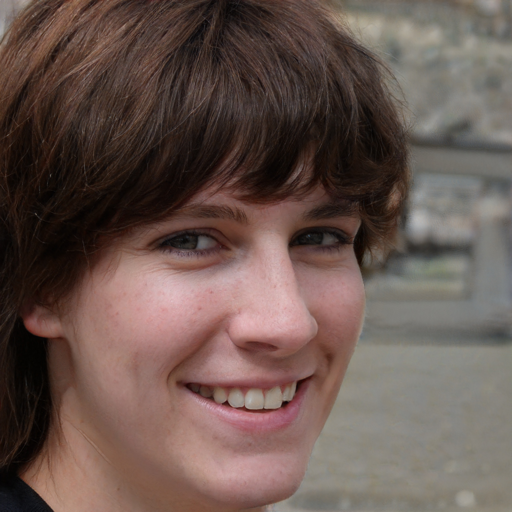

In [5]:
# Define the URL of the image file on GitHub
image_file = "/content/images/face_2.jpeg"

# open an image 
image = Image.open(image_file)

# Get the original size of the image
width, height = image.size
print("Original image size:", width, height)

# Resize the image to half its original size
new_size = (int(width/2), int(height/2))
resized_image = image.resize(new_size)

new_width, new_height = resized_image.size
print("Resized image size:", new_width, new_height)

# Display the image in the Colab notebook
display(resized_image)

# Get the new size of the image


# Example Loop over Excel file


---

1. import excel file 


In [8]:
match_file = pd.read_excel("/content/images/MatchSourceTarget.xlsx")
match_file.head()

,match_id,source_image,target_image,expected_match
0,100,face_1.jpeg,face_1_2.jpeg,match
1,101,face_2.jpeg,face_2_2.jpeg,match
2,102,face_3.jpeg,face_3_2.jpeg,match
3,103,face_4.jpeg,face_4_2.jpeg,match
4,104,face_5.jpeg,face_5_2.jpeg,match


# 2. Use a For loop 
loop over the dataframe using iterrows()

In [11]:

for index, row in match_file.iterrows():
  source_img = "/content/images/{}".format( row['source_image'])
  target_img = "/content/images/{}".format( row['target_image'])
  print("call match_faces({}, {}) here!".format( source_img, source_img))
  # call your matchign function here! 

call match_faces(/content/images/face_1.jpeg, /content/images/face_1.jpeg) here!
call match_faces(/content/images/face_2.jpeg, /content/images/face_2.jpeg) here!
call match_faces(/content/images/face_3.jpeg, /content/images/face_3.jpeg) here!
call match_faces(/content/images/face_4.jpeg, /content/images/face_4.jpeg) here!
call match_faces(/content/images/face_5.jpeg, /content/images/face_5.jpeg) here!
call match_faces(/content/images/face_6.jpeg, /content/images/face_6.jpeg) here!
call match_faces(/content/images/face_7.jpeg, /content/images/face_7.jpeg) here!
call match_faces(/content/images/face_8.jpeg, /content/images/face_8.jpeg) here!
call match_faces(/content/images/face_9.jpeg, /content/images/face_9.jpeg) here!
call match_faces(/content/images/face_10.jpeg, /content/images/face_10.jpeg) here!
call match_faces(/content/images/face_11.jpeg, /content/images/face_11.jpeg) here!
call match_faces(/content/images/face_12.jpeg, /content/images/face_12.jpeg) here!
call match_faces(/cont

stuff from the notebook! 

# 4. Compare two faces

1. load two faces using `load_image_file`
  - load_image_file : When you call load_image_file with a file path as an argument, it reads the image file from disk and converts it into a **NumPy array**. The NumPy array represents the image as a **matrix of pixel values**, where each pixel is represented by a set of **RGB (red, green, blue)** values.

2. Compare the `face_encodings` similarity using `face_distance` - this produces the Euclidean distance between two face encodings.  In facial recognition, a face encoding is a vector of numbers that represents the features of a face. Each element in the vector represents a different feature, such as the distance between the eyes or the shape of the jawline. The face encoding is generated by a neural network trained on large datasets of faces.

- The face_distance function takes two lists of face encodings as arguments and returns a list of distances between each pair of face encodings. The distance between two face encodings is a measure of how different the faces are from each other. **A lower distance value means that the faces are more similar** to each other, while a **higher distance value means that the faces are more different**.
- i like to normalize the distance by creating `similarity = 1 - distance`

3. The compare_faces function takes two lists of face encodings as arguments and returns a list of Boolean values that indicate whether the corresponding face encodings are a match or not. A True value means that the faces are a match, while a False value means that they are not a match.

4. Display side by side



In [ ]:
# 1. load two faces usig load_image_file
face_file1 = "/content/faces/face_4.jpeg"
face_file2 = "/content/faces/face_4_2.jpeg"
image1 = face_recognition.load_image_file(face_file1)
image2 = face_recognition.load_image_file(face_file2)


In [ ]:
# 2. Compare the face_encodings similarity using face_distance
img1_encoding = face_recognition.face_encodings(image1)[0]
img2_encoding = face_recognition.face_encodings(image2)[0]

# Calculate the distance between the faces
face_distance = face_recognition.face_distance([img1_encoding], img2_encoding)

# Normalize the distance to get the similarity score
similarity = 1 - face_distance[0]

# Print the similarity score
print("The two faces are '{:.2f}%' similar".format(similarity*100))


The two faces are '60.16%' similar


In [ ]:
# 3. is it a match? 
face_matches = face_recognition.compare_faces([img1_encoding], img2_encoding)

# Print the result
if face_matches[0]:
    print("The two faces match")
else:
    print("The two faces do not match")

The two faces match


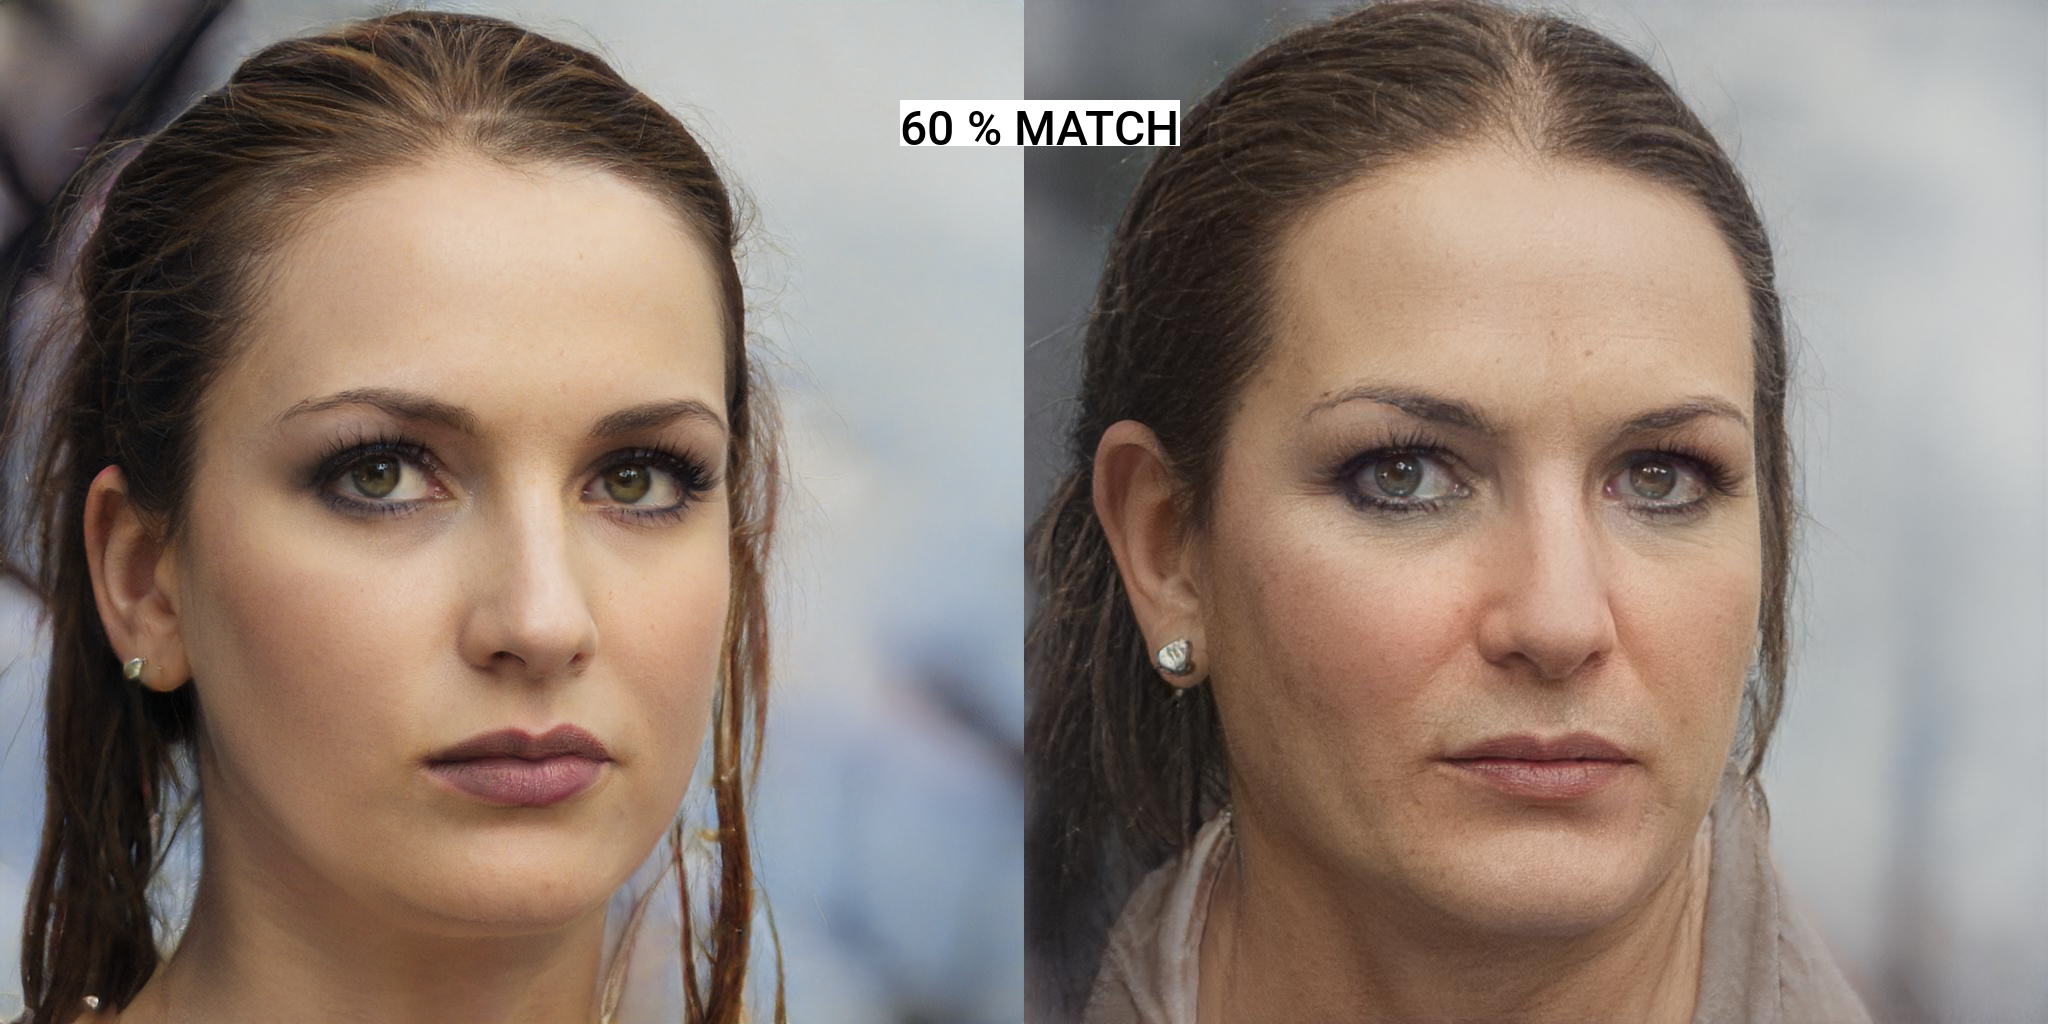

In [ ]:
# 4. Display Side by Side 

# Open the two image files
image1 = Image.open(face_file1)
image2 = Image.open(face_file2)

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Create a new blank image with a size equal to the sum of the widths of the two images
new_image = Image.new("RGB", (width1 + width2, max(height1, height2)))

# Paste the first image onto the new image at position (0, 0)
new_image.paste(image1, (0, 0))

# Paste the second image onto the new image at position (width1, 0)
new_image.paste(image2, (width1, 0))

# Add text to the image
text = '{} % MATCH'.format(int(similarity*100))
font = ImageFont.truetype("/content/faces/Roboto-Medium.ttf", size=48)
draw = ImageDraw.Draw(new_image)
text_width, text_height = draw.textsize(text, font)
left = 900
top =  100
right = left + text_width
bottom = top + text_height
draw.rectangle(((left, top), (right, bottom)), fill=(255, 255, 255, 128))
draw.text((left, top), text, font=font, fill=(0, 0, 0, 255))

# Save the new image to a file
new_image.save("merged_image.jpg")

# Display the new image
new_image.show()